# **Probability and Information Theory in AI**

**Probability theory** is a fundamental mathematical language for representing and managing uncertainty. In AI, it has two crucial roles:

1. **Algorithm design**: The **laws of probability guide how AI systems should reason**. Algorithms are therefore built to compute (or approximate) probabilistic expressions.
2. **Theoretical analysis**: We use **probability and statistics to study the expected behavior** of models and evaluate their performance.

**Why is it important?**
If you come from a software engineering background, this theory allows you to formally deal with uncertainty and develop robust models.

**Information theory**, on the other hand, is used to **quantify uncertainty** within a probability distribution. It measures concepts such as:
- Entropy
- Mutual information
- Efficient coding (e.g. compression)

These two theories are closely related and fundamental in many modern machine learning and deep learning techniques (e.g. generative models, Bayesian learning, probabilistic loss metrics).

> **Note**: if you already know these basics, you may want to skip this chapter except for section 3.14, which introduces **structured probabilistic graphs**, key tools for visually representing complex models (e.g. Bayesian networks, Markov models).

## **Why Probability is Essential in Artificial Intelligence**

While many branches of computer science rely on deterministic systems (e.g. a CPU instruction that executes correctly), **artificial intelligence and machine learning constantly face uncertainty**.

#### **Sources of Uncertainty in AI Systems**
1. **Intrinsic Stochasticity**: such as in quantum mechanics or randomly shuffled card games.
2. **Incomplete [Observability](https://www.ibm.com/think/topics/observability)**: even deterministic systems can appear random if we do not observe all the variables (e.g. Monty Hall problem).
3. **Incomplete Modeling**: simplifications or discretizations (such as a robot that divides space into cells) introduce uncertainty, even if the observation is accurate.

> **Note for your practical case**: audio or NLP models also simplify reality, so they use probabilities to handle what is not represented exactly.

#### **Why not just use deterministic rules?**
Because **simple but probabilistic rules are often more effective**, understandable and versatile than complex and rigid rules. Example:
- “Most birds fly” is more useful in practice than an exhaustive and fragile enumeration of all exceptions.

#### **Frequentist vs Bayesian**
- **Frequentist**: probability represents the **frequency of an event** in repeated trials (e.g. a hand of poker).
- **Bayesian**: probability represents the **degree of subjective belief** in a hypothesis given the evidence (e.g. probability that a patient has the flu).

Despite philosophical differences, **the two theories use the same mathematical rules**. In AI, the Bayesian point of view is often adopted to represent subjective uncertainty, but the formulas shared with the frequentist approach are used.

#### **Probability as an extension of logic**
- **Logic** manages certainties: from true premises, certain consequences are deduced.
- **Probability** generalizes this mechanism: from degrees of certainty on some propositions, it deduces degrees of certainty on others.

### **Random Variables**

A **random variable** is a variable that can take on values ​​**randomly**.

#### Key concept:
> It is not just a value, but **a description of all the possible states** that a phenomenon can take, **along with** a probability distribution that says how likely each is.

#### Notation:
- The variable itself is indicated in *normal lowercase* → `x`
- The values ​​it can take are indicated in *italics* → `𝑥₁`, `𝑥₂`
- For **vector variables**:
- The variable is `𝒙`, the value is `𝒙` (often the same symbol, context changes)

### **Probability Distributions**

A **probability distribution** describes **how likely it is** that a random variable (or a set) will take certain values.
The way we represent it **depends on the type of variable**:

- For **discrete** variables → we use a **Probability Mass Function (PMF)**
- For **continuous** variables → we will use a **Probability Density Function (PDF)** (not yet seen here)

### **Discrete Variables and PMF (Probability Mass Function)**

The **PMF** associates to each possible state of a discrete variable `x` a **probability $P(x)$**.
Example: if `x` can be "heads" or "tails", $P(x=“heads”) = 0.5$.

#### Notations:
- **$P(x)$** = probability that the variable `x` takes a certain value.
- **$P(x = xᵢ)$** = explicit form, to avoid ambiguity.
- **$x ∼ P(x)$** = “x follows the distribution $P(x)$”

#### Fundamental properties of every PMF:
1. **Valid values**:
$$
\forall x \in \mathcal{X}, \quad 0 \leq P(x) \leq 1
$$
(No probability can be negative or greater than 1)

2. **Normalization** (the sum of the probabilities is 1):
$$
\sum_{x \in \mathcal{X}} P(x) = 1
$$

3. **Definition on a discrete domain**: $`P`$ must be defined on all possible values ​​of the variable.

### **Example: uniform distribution**

Suppose a discrete variable $`x`$ with $`k`$ possible states.

If we want each state to be **equally probable**, the distribution is uniform:

#### Formula:
$$
P(x = x_i) = \frac{1}{k} \quad \text{for each } i \in \{1, ..., k\} \tag{3.1}
$$

#### Normalization check:
$$
\sum_i P(x = x_i) = \sum_i \frac{1}{k} = \frac{k}{k} = 1 \tag{3.2}
$$

### Extension – Joint PMF

For multiple variables $(`x` and `y`)$, the joint distribution is:

$$
P(x = x_i, y = y_j) = \text{Probability that } x = x_i \text{ and } y = y_j \text{ together}
$$

Often written as $`P(x, y)`$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Exercise: Let's simulate a discrete random variable with 5 states (e.g. {a, b, c, d, e})
# We want a uniform probability distribution

states = ['a', 'b', 'c', 'd', 'e']
k = len(states)

In [3]:
# Uniform distribution: each state has probability 1/k
probability = np.full(k, 1/k)
probability

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
# Let's sample 1000 values ​​from this distribution
samples = np.random.choice(states, size=1000, p=probability)
samples

array(['c', 'a', 'e', 'c', 'd', 'e', 'b', 'a', 'd', 'b', 'e', 'c', 'd',
       'd', 'c', 'a', 'b', 'b', 'd', 'c', 'b', 'a', 'b', 'a', 'c', 'c',
       'b', 'a', 'b', 'e', 'd', 'd', 'c', 'a', 'c', 'd', 'b', 'b', 'a',
       'c', 'c', 'e', 'b', 'd', 'a', 'b', 'a', 'e', 'b', 'a', 'd', 'e',
       'c', 'b', 'd', 'c', 'e', 'e', 'd', 'e', 'e', 'e', 'd', 'b', 'a',
       'e', 'b', 'e', 'c', 'e', 'a', 'c', 'c', 'b', 'b', 'a', 'd', 'b',
       'a', 'a', 'b', 'd', 'c', 'a', 'a', 'a', 'b', 'c', 'd', 'e', 'c',
       'c', 'b', 'b', 'e', 'd', 'a', 'a', 'd', 'a', 'a', 'e', 'a', 'd',
       'a', 'a', 'e', 'c', 'c', 'c', 'd', 'a', 'd', 'a', 'e', 'b', 'e',
       'e', 'b', 'b', 'a', 'e', 'e', 'b', 'a', 'e', 'e', 'a', 'c', 'e',
       'a', 'a', 'c', 'e', 'd', 'b', 'a', 'a', 'd', 'd', 'c', 'd', 'b',
       'd', 'b', 'c', 'b', 'c', 'd', 'c', 'a', 'b', 'e', 'c', 'e', 'd',
       'c', 'c', 'b', 'd', 'c', 'c', 'b', 'd', 'd', 'e', 'd', 'c', 'a',
       'd', 'e', 'b', 'd', 'a', 'a', 'b', 'b', 'e', 'b', 'c', 'd

In [5]:
# Let's calculate the observed relative frequencies
values, counts = np.unique(samples, return_counts=True)
observed_frequencies = counts / len(samples)

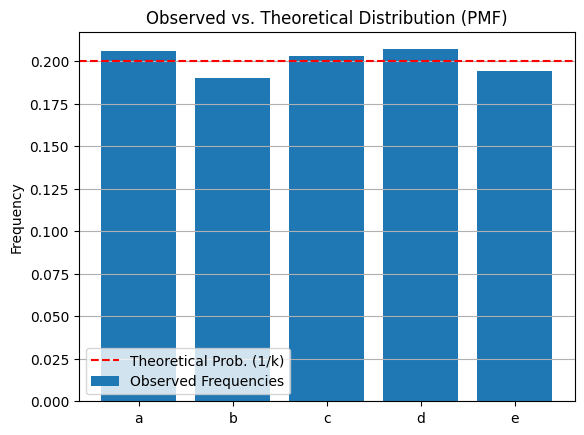

In [6]:
# Display
plt.bar(values, observed_frequencies, label="Observed Frequencies")
plt.axhline(1 / k, color='red', linestyle='--', label="Theoretical Prob. (1/k)")
plt.title("Observed vs. Theoretical Distribution (PMF)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y')
plt.show()

### **What we did**
1. **Defined a discrete random variable** with 5 possible states: `'a', 'b', 'c', 'd', 'e'`
2. Assigned each state a **uniform theoretical probability**:
$$
P(x = x_i) = \frac{1}{5} = 0.2
$$
3. **Generated 1000 random samples** according to this distribution (simulation of real observations)
4. **Counted** how many times each state appeared → obtained **empirical frequencies**
5. **Compared** these frequencies with the theoretical probabilities using a graph

## **Continuous Variables and PDFs**

When a random variable `x` can take **real (infinite) values**, we no longer use a PMF but a:

### ➤ **Probability Density Function (PDF)**

A PDF is a function `p(x)` that describes **how “dense” the probability is around a point**, but:

> **Not probable assignment to individual values**, because in a continuum:
>$$
P(x = c) = 0 \quad \text{for every } c
$$

### **Properties of a PDF `p(x)`**
1. **Definition on the entire domain**:
&&
\text{Domain of } p = \mathcal{X}, \quad \text{set of possible values ​​of } x
&&
2. **Non-negativity**:
&&
\forall x \in \mathcal{X}, \quad p(x) \geq 0
&&
3. **Normalization** (total integral = 1):
$$
\int_{-\infty}^{\infty} p(x) \, dx = 1
$$

---

### **Practical interpretation**
The PDF $`p(x)`$ is **not a probability**, but a **density**.
To obtain a true probability between two values ​​(e.g. between `a` and `b`), **integrate**:

$$
P(a \leq x \leq b) = \int_a^b p(x) \, dx
$$

### **Example – Continuous uniform distribution**

PDF of a variable $`x ∼ U(a, b)`$:

$$
u(x; a, b) =
\begin{cases}
\frac{1}{b - a} & \text{if } x \in [a, b] \\
0 & \text{otherwise}
\end{cases}
$$

- Constant on `[a, b]` → each value has **equal density**
- Total area under the curve = 1 ⇒ **valid** distribution

In [7]:
# Reloading libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform 

In [8]:
# Let's define the interval of the continuous uniform
a = 2 # start interval
b = 5 # end interval

In [9]:
# Let's create a uniform continuous PDF U(a, b)
x = np.linspace(a - 1, b + 1, 1000)
pdf = uniform.pdf(x, loc=a, scale=b - a) # loc=a, scale=b-a define the range

In [10]:
# Sample 1000 values ​​from U(a, b)
samples = uniform.rvs(loc=a, scale=b - a, size=1000)

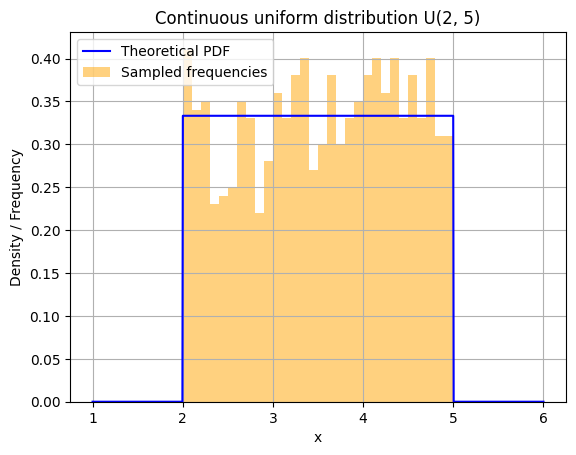

In [11]:
# Theoretical PDF graph
plt.plot(x, pdf, label="Theoretical PDF", color='blue')
plt.hist(samples, bins=30, density=True, alpha=0.5, label="Sampled frequencies", color='orange')
plt.title("Continuous uniform distribution U(2, 5)")
plt.xlabel("x")
plt.ylabel("Density / Frequency")
plt.legend()
plt.grid(True)
plt.show()

## **PMF vs PDF – Fundamental Difference**

| **Characteristic** | **PMF (Discrete)** | **PDF (Continue)** |
|------------------------------|----------------------------------------------------------|----------------------------------------------------------|
| **Variable type** | Discrete (e.g. words, integers, labels) | Continuous (e.g. time, frequency, amplitude) |
| **Value it returns** | A **true probability**: $( P(x = x_i) \in [0,1] )$ | A **density**: $( p(x) \geq 0 )$, but it is not a probability |
| **Sum or integral** | $( \sum_x P(x) = 1 )$ | $( \int p(x)\,dx = 1 )$ |
| **Exact probability** | $( P(x = x_i) > 0 )$ is possible | $( P(x = c) = 0 )$ always |
| **Interval probability** | Sum: $( P(x \in A) = \sum_{x_i \in A} P(x_i) )$ | Integral: $( P(x \in A) = \int_A p(x)\,dx )$ |
| **Example** | Dice rolls: $( P(x = 6) = 1/6 )$ | Audio amplitude: $( p(x) = \text{Gaussian centered at 0} )$ |

---

### In practice:

- **PMF**:
> Gives the **exact** probability of each discrete state
> Eg. `"head"` has $( P = 0.5 )$

- **PDF**:
> Gives the **probability density**, not the probability of a point
> Eg. $( p(x) = 0.2 )$ at a point **does not mean** that the probability is 0.2
> It means that in that area, the density is 0.2

To get a **true probability** from a PDF, you have to **integrate over an interval**:
$$
P(a \leq x \leq b) = \int_a^b p(x) \, dx
$$

---

### Mental image:

- **PMF** is a list of probabilities assigned to "blocks".
- The **PDF** is a **continuous curve**, where the area under a piece is the probability.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

In [16]:
# === Part 1: Discrete Random Variable (PMF) ===
# Let's simulate a 6-sided die
discrete_states = np.arange(1, 7) # values ​​from 1 to 6
theoretical_pmf = np.full(6, 1/6) # uniform distribution

# Let's sample 1000 die rolls
discrete_samples = np.random.choice(discrete_states, size=1000, p=theoretical_pmf)

# Let's calculate the empirical frequencies
d_values, d_counts = np.unique(discrete_samples, return_counts=True)
empirical_frequencies_d = d_counts / len(discrete_samples)

In [18]:
# === Part 2: Continuous Random Variable (PDF) ===
# Let's simulate a continuous uniform variable between 0 and 10
a, b = 0, 10
x = np.linspace(a - 1, b + 1, 1000)
pdf_teorica = uniform.pdf(x, loc=a, scale=b - a)

# Let's sample 1000 values
continuous_samples = uniform.rvs(loc=a, scale=b - a, size=1000)

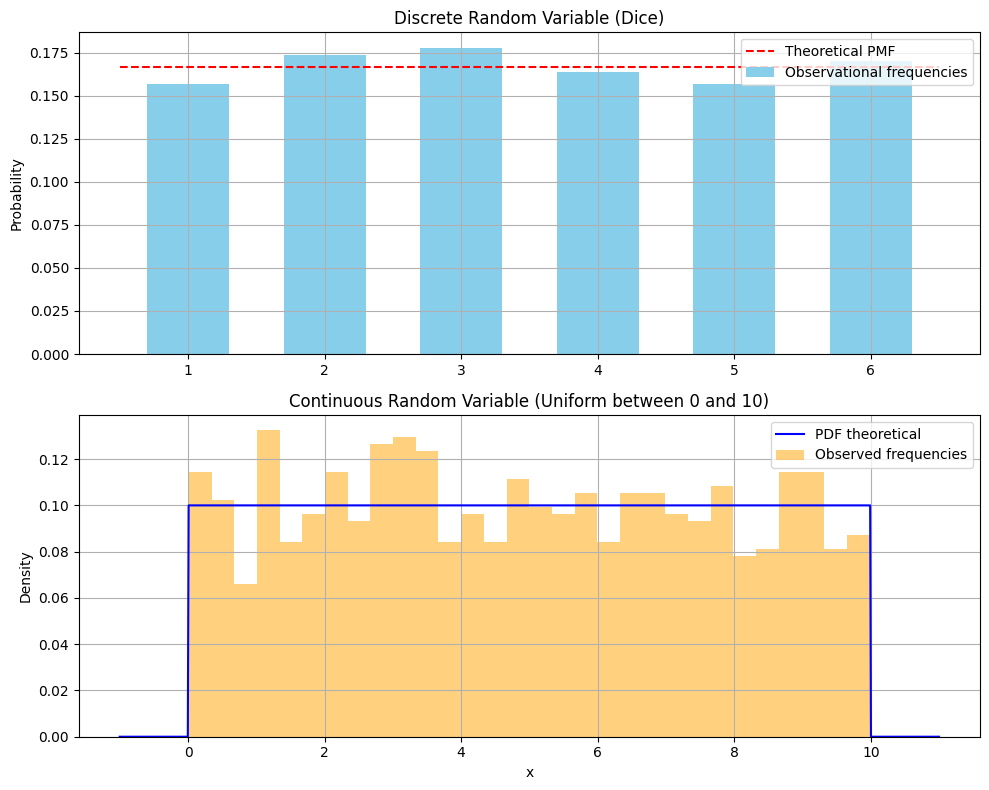

In [20]:
# === Display ===

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Discrete
axs[0].bar(d_values, empirical_frequencies_d, width=0.6, label='Observational frequencies', color='skyblue')
axs[0].hlines(1/6, xmin=0.5, xmax=6.5, color='red', linestyle='--', label='Theoretical PMF')
axs[0].set_title('Discrete Random Variable (Dice)')
axs[0].set_ylabel('Probability')
axs[0].set_xticks(discrete_states)
axs[0].legend()
axs[0].grid(True)

# Continue
axs[1].plot(x, pdf_teorica, label='PDF theoretical', color='blue')
axs[1].hist(continuous_samples, bins=30, density=True, alpha=0.5, label='Observed frequencies', color='orange')
axs[1].set_title('Continuous Random Variable (Uniform between 0 and 10)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Density')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### **Part 1: Discrete Random Variable (PMF)**
- Let's simulate **a 6-sided die**:
- Each value has $( P(x = i) = \frac{1}{6} )$
- The **theoretical PMF** is a flat red line
- The **observed frequencies** (blue bars) approach the theoretical one with 1000 throws

Here **we can say** that $( P(x = 3) = \frac{1}{6} )$

### **Part 2: Continuous Random Variable (PDF)**
- Let's simulate a **continuous uniform** distribution on $([0, 10])$
- The **theoretical PDF** is a flat curve between 0 and 10 with value:
$$
p(x) = \frac{1}{10 - 0} = 0.1
$$
- The **observed frequencies** (orange histogram) approach PDF

❗ Here:
- **It makes no sense to say** $( P(x = 3.14) )$
- But it makes sense to say:
$$
P(3 \leq x \leq 4) = \int_3^4 p(x) dx = 0.1 \cdot (4 - 3) = 0.1
$$

---

### **What you learned in practice**
| **Type** | **PMF (Discrete)** | **PDF (Continued)** |
|--------------|------------------------------------------|--------------------------------------------|
| Probability | Direct on single value $( P(x) )$ | Only on interval $( \int_a^b p(x) dx )$ |
| Values ​​| Finite or countable | Infinitely dense (real) |
| Representation | Discrete bars | Continuous curve + histogram |

### **PMF – Precise, Countable Values**
> “What is the probability that **exactly** 3 will come up?”

- The PMF gives you the **precise answer for each value**
- You can **add** the probabilities of multiple values
- It’s like counting **how many marbles there are of each color** in a bag

> Example:
> Dice → $( P(x = 3) = \frac{1}{6} )$
> Do you want to know the probability that **3 or 5** will come up?
> Just do: $( P(3) + P(5) = \frac{1}{6} + \frac{1}{6} = \frac{1}{3} )$

### **PDF – Infinite, Continuous Values**
> “I pick a random number between 1 and 10.
> What is the probability that it will be **exactly 4.00000**?”

- Answer: **0** → because on an **infinite sea**, a point **has no weight**
- To get a probability, you have to look at a **range**, like:
$$
P(4 \leq x \leq 5) = \text{area under the curve between 4 and 5}
$$

> It's like saying:
> "In which area of ​​the sea are there **more fish**?"
> The **PDF** shows you where the probability **is “densest”**
> But to know **how many fish there really are**, you have to take a **net (range)**

---

### Final comparison (your summary, improved)
- **PMF**: tells you **how probable each precise value** is, you can **make direct comparisons**
- **PDF**: tells you **how dense the probability** is in an area, on an **infinite set of possibilities**

## **Marginal Probability**

> **Marginalizing** means:
> **"Let's focus only on one variable, ignoring the other."**

You have a distribution on **multiple variables** (e.g. `P(x, y)`), but you want to know **only about `x`**.

### **Practical Example – Discrete**
Imagine you have a table with:
- **Rows** = values ​​of `x` (e.g. color of a ball)
- **Columns** = values ​​of `y` (e.g. weight of the ball)

You have the **joint probability** $( P(x, y) )$, that is:
> "How likely is it that the ball is **red and heavy**?"

But you only want to know:
> "How likely is it that it is **red**, period."

### **Formula (discrete)**:
$$
P(x) = \sum_y P(x, y) \tag{3.3}
$$

- Add all the probabilities of $`P(x, y)`$ for each possible value of `y`
- It's like **adding a row of the table**

### **Continuous case**
When the variables are continuous (e.g. real `x` and `y`):

$$
p(x) = \int p(x, y) \, dy \tag{3.4}
$$

- Instead of **adding**, you **integrate** along the `y` axis
- You get the **marginal density of `x`**

### **Why is it called "marginal"?**
Because when you write $`P(x, y)`$ in a table, you put the sum **in the margin**, at the side of the row → hence the name “**marginal probability**”.

In [22]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Reload libraries after reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definition of x and y variables
x_values = ['red', 'green', 'blue']
y_values = ['light', 'medium', 'heavy']

In [13]:
# Joint distribution P(x, y)
Pxy = np.array([ 
[0.1, 0.1, 0.1], # x = red 
[0.05, 0.15, 0.1], # x = green 
[0.05, 0.05, 0.2] # x = blue
])

# Normalize P(x, y) to ensure the sum is 1
Pxy = Pxy / Pxy.sum()

# Recalculation P(x)
Px = Pxy.sum(axis=1)

In [15]:
# Readable table
x_values = ['red', 'green', 'blue']
y_values = ['light', 'medium', 'heavy']
table = pd.DataFrame(Pxy, index=x_values, columns=y_values)
table['P(x)'] = Px

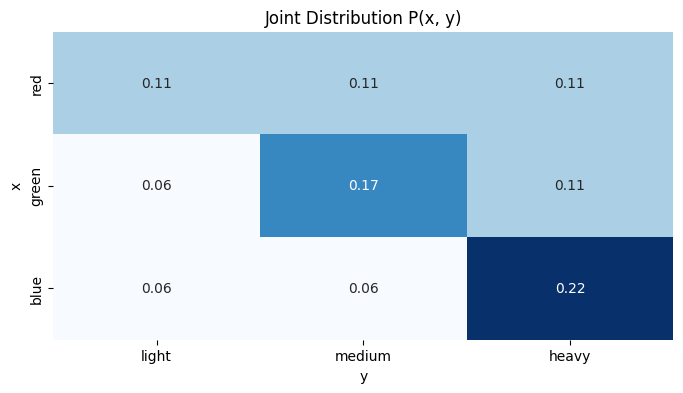

In [16]:
# Joint deployment heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(table.iloc[:, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Joint Distribution P(x, y)")
plt.xlabel("y")
plt.ylabel("x")
plt.show()

### **What we did:**
- We created a **joint distribution `P(x, y)`** with:
- `x` = color: red, green, blue
- `y` = weight: light, medium, heavy

- We then **calculated `P(x)`**, the **marginal probability**, **adding over all y**:
$$
P(x) = \sum_y P(x, y)
$$

## **Conditional Probability (Conditional Probability)**

> You want to know the **probability that `y` will happen**, **knowing that** `x` has already happened.

### **Key formula (discrete):**
$$
P(y \mid x) = \frac{P(x, y)}{P(x)} \tag{3.5}
$$

- It is defined **only if $$`P(x) > 0`$$**
- It means: **"among all the cases where `x` happens, how many also have `y`?"**

### **Example**
You have:
- `P(x = red, y = heavy) = 0.1`
- `P(x = red) = 0.3`

Then:
$$
P(y = heavy \mid x = red) = \frac{0.1}{0.3} \approx 0.33
$$

> So: **if you know it is red**, there is a **1 in 3** chance that it is heavy.

---

### **Important to distinguish:**
- **Conditioning** = knowing something **a posteriori** → the probability is updated
- **Intervention** = **modifying** the world (e.g. “I make someone learn German”)
- This is the domain of **causality**, not covered in this chapter.

> Key example:
> - `P(Germany | speaks German)` is high
> - But **teaching German** does not change the country of origin

## **Marginal Probability**
- **Marginalizing** means ignoring the variables you don't care about.
- Example: you have `P(x, y)` and you only want `P(x)`
→ you sum over `y`:
$$
P(x) = \sum_y P(x, y)
$$
or in the continuous case:
$$
p(x) = \int p(x, y) \, dy \tag{3.4}
$$

The name “marginal” comes from the fact that, **on paper**, you wrote `P(x)` **in the margin** of the table after adding the rows.

## **Conditional Probability**

> You want to know the **probability that `y` will happen**, **knowing that** `x` has already happened.

---

### **Key formula (discrete):**
$$
P(y \mid x) = \frac{P(x, y)}{P(x)} \tag{3.5}
$$

- It is defined **only if `$P(x) > 0$`**
- It means: **"among all the cases where `x` happens, how many also have `y`?"**

### **Example**
You have:
- `P(x = red, y = heavy) = 0.1`
- `P(x = red) = 0.3`

Then:
$$
P(y = heavy \mid x = red) = \frac{0.1}{0.3} \approx 0.33
$$

> So: **if you know it is red**, there is a **1 in 3** chance that it is heavy.

### **Important to distinguish:**
- **Conditioning** = knowing something **a posteriori** → the probability is updated
- **Intervention** = **modifying** the world (e.g. “I make someone learn German”)
- This is the domain of **causality**, not covered in this chapter.

> Key example:
> - `P(Germany | speaks German)` is high
> - But **teaching German** does not change the country of origin

In [6]:
import numpy as np
import pandas as pd

In [8]:
# Let's reconstruct the joint distribution P(x, y)
Pxy = np.array([
    [0.111111, 0.111111, 0.111111],  # x = red
    [0.055556, 0.166667, 0.111111],  # x = green
    [0.055556, 0.055556, 0.222222]   # x = blue
])

In [9]:
x_values = ['red', 'green', 'blue']
y_values = ['light', 'medium', 'heavy']

In [10]:
# Marginal P(x) calculation
Px = Pxy.sum(axis=1)

In [13]:
# Let's calculate P(y = 'heavy' | x = 'green')
x_index = x_values.index('green')
y_index = y_values.index('heavy')

In [15]:
P_xy = Pxy[x_index, y_index]
P_x = Px[x_index]
P_y_given_x = P_xy / P_x

P_y_given_x

np.float64(0.3333323333353333)

$$
P(y = \text{"heavy"} \mid x = \text{"green"}) = \frac{P(x = \text{"green"}, y = \text{"heavy"})}{P(x = \text{"green"})}
$$
---

### Result:
$$
P(\text{heavy} \mid \text{green}) \approx 0.333
$$

## **Dependence, Independence and Expectation**

### **Probability Factorization**
- Joint probabilities can be **decomposed into products of conditional probabilities**.
Example:
$$
P(a, b, c) = P(a | b, c) \cdot P(b | c) \cdot P(c)
$$
- This principle is the basis of **probabilistic models structured** as Bayesian graphs.

### **Independence**
Two variables `x` and `y` are **independent** if:
$$
p(x, y) = p(x) \cdot p(y)
$$
That is: knowing `x` **tells you nothing** about `y`.

### **Conditional Independence**
`x` and `y` are **conditionally independent given `z`** if:
$$
p(x, y | z) = p(x | z) \cdot p(y | z)
$$
Once you know `z`, `x` and `y` **no longer influence each other**.

### **Expectation – Expected Value**
It is the **weighted average** of a function, with respect to the probability distribution.

- **Discrete**:
$$
\mathbb{E}[f(x)] = \sum_x P(x) f(x)
$$
- **Continuous**:
$$
\mathbb{E}[f(x)] = \int p(x) f(x)\, dx
$$

It is the **average quantity** you expect to get if you repeat the experiment many times.

### **Variance**
Measures **how much the values ​​are away from the mean**:

$$
\text{Var}(f(x)) = \mathbb{E}\left[(f(x) - \mathbb{E}[f(x)])^2\right]
$$

✔ Higher = more variability
✔ **Standard deviation** is the square root of the variance.

### **Covariance**
Measures **how much two variables change together**:

$$
\text{Cov}(f(x), g(y)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])(g(y) - \mathbb{E}[g(y)])]
$$

- If it is **positive**: when one goes up, the other tends to go up too
- If it is **negative**: one goes up when the other goes down
- If it is **0**: no linear relationship (but **does not mean independence**)

### Warning:
- **Covariance = 0** does not mean **independence**.
There are **non-linear** dependencies that covariance **does not detect**.
- **Independence** is a **stronger** condition.

### Covariance matrix
For a vector `x ∈ ℝⁿ`, the **covariance matrix** is an `n × n`:
$$
\text{Cov}(x)_{i,j} = \text{Cov}(x_i, x_j)
$$

- Diagonal → variance of each component
- Off-diagonal → relations between variables

## **Structured Probabilistic Models**

### **Factorize = simplify**
- Instead of describing a distribution with **a huge formula**, we break it down into **small pieces**:
$$
p(a, b, c) = p(a) \cdot p(b | a) \cdot p(c | b)
$$
- This **reduces the parameters** needed → very useful for complex models.

### **Graphical Models = visual representations**
- We use **graphs** (nodes + edges) to represent **which variables influence who**
- They are a **language** to describe distributions → they are not exclusive nor constraining

### ➤ **Direct Models (Bayesian)**
- They use **directional edges** (like arrows)
- Each node represents a variable **conditioned by the parents**:
$$
p(x_1, ..., x_n) = \prod_i p(x_i \mid \text{relatives of } x_i)
$$

### ➤ **Indirect Models (Markovian)**
- They use **non-directional edges**
- Each group of variables (clique) has an associated **function**:
$$
p(x) = \frac{1}{Z} \prod_i \phi_i(C_i)
$$
- The φ are not true probabilities → they must only be **positive**
- **Normalization** is needed with constant $( Z )$

### **Important note**
- **Direct or indirect** is not a property of the distribution, but of **its description**
- The same model can be described in both ways

### What is all this for?
- It allows you to **model complex relationships** between variables in a modular way
- It is the conceptual basis of many deep learning and probabilistic AI models

# **Probability & Information Theory – Summary Chart**

---

## **1. Why Probability in AI**
- AI ≠ certainties: it works with **uncertainty, incomplete, or noisy data**.
- **Probability**:
  - Guides the *reasoning of algorithms*.
  - Allows *theoretical analysis* of their behavior.

---

## **2. Types of Probability**
- **Frequentist** → Percentage of events in repeated experiments.
- **Bayesian** → Degree of subjective confidence (credibility).
- Same math, different uses.

---

## **3. Random Variables**
- A **random variable `x`** assumes random values according to a distribution.
- It can be:
  - **Discrete** → PMF (Probability Mass Function).
  - **Continuous** → PDF (Probability Density Function).

---

## **4. Distributions**

### PMF – *Probability Mass Function*
- **Discrete** values.
- Example: rolling a die.
- Properties:
  $$
  P(x) \in [0, 1]
  $$
  $$
  \sum_x P(x) = 1
  $$

### PDF – *Probability Density Function*
- **Continuous** values.
- Example: time, audio amplitude.
- Properties:
  $$
  p(x) \geq 0
  $$
  $$
  \int p(x) dx = 1
  $$
  $$
  P(x = a) = 0
  $$
  - Only intervals make sense.

---

## **5. Marginalization**
- Remove a variable:
  $$
  P(x) = \sum_y P(x, y)
  $$
  $$
  p(x) = \int p(x, y) dy
  $$
- Focus only on `x`, ignoring `y`.

---

## **6. Conditional Probability**
- How likely is `y` **knowing that** `x` happened?
  $$
  P(y | x) = \frac{P(x, y)}{P(x)} \quad \text{if } P(x) > 0
  $$
> **Distinction**:
> - **Conditioning** = observation.
> - **Intervention** = manipulation → *causality*.

---

## **7. Independence**
- Independence:
  $$
  x \perp y \iff P(x, y) = P(x) P(y)
  $$
- **Conditional Independence**:
  $$
  x \perp y \mid z \iff P(x, y | z) = P(x | z) P(y | z)
  $$

---

## **8. Expectation, Variance, Covariance**

### **Expected Value**:
$$
\mathbb{E}[f(x)] = \sum_x P(x)f(x) \quad \text{or } \int p(x)f(x)dx
$$

### **Variance**:
- Measures how much `f(x)` deviates from the mean:
$$
\text{Var}(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]
$$

### **Covariance**:
- Measures how two variables change together:
$$
\text{Cov}(x, y) = \mathbb{E}[(x - \mathbb{E}[x])(y - \mathbb{E}[y])]
$$
> ⚠ Covariance $( \text{Cov} = 0 )$ does **not** imply independence!

---

## **9. Structured Probabilistic Models**
- Break $( P(x_1, ..., x_n) )$ into **simpler factors**.

### **Direct (Bayesian) Models**
- **Directed Graphs**:
$$
P(x_1, ..., x_n) = \prod_i P(x_i | \text{parents}_G(x_i))
$$

### **Indirect (Markov) Models**
- **Non-Directional Graphs**:
$$
P(x) = \frac{1}{Z} \prod_i \phi(C_i)
$$
- The $( \phi )$'s are positive functions, **not** distributions.
- Need normalization with constant $( Z )$.

In [16]:
# Exercise
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Set seed for reproducibility
np.random.seed(64)